In [1]:
# Tome series
# Furniture Sales data

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [91]:
help(sm)

Help on module statsmodels.api in statsmodels:

NAME
    statsmodels.api

DESCRIPTION
    # -*- coding: utf-8 -*-
    # flake8: noqa

VERSION
    0.12.0

FILE
    c:\users\admin\anaconda3\lib\site-packages\statsmodels\api.py




In [2]:
furniture = pd.read_csv("Super Store.csv", encoding = "cp1252") 

In [3]:
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [4]:
furniture.shape

(2121, 21)

In [5]:
furniture.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [6]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [7]:
furniture["Order Date"].min(),furniture["Order Date"].max()

('1/1/2017', '9/9/2017')

In [8]:
#furniture2 = furniture[["Order Date","Sales"]]

In [10]:
#furniture2.head()

In [11]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)

In [12]:
furniture.head()

,Order Date,Sales
0,11/8/2016,261.9600
1,11/8/2016,731.9400
2,10/11/2015,957.5775
3,6/9/2014,48.8600
4,6/9/2014,1706.1840


In [13]:
furniture = furniture.sort_values('Order Date')

In [14]:
furniture.head()

,Order Date,Sales
845,1/1/2017,474.430
1707,1/1/2017,141.420
1708,1/1/2017,310.744
179,1/1/2017,48.896
181,1/10/2014,51.940


In [15]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [ ]:
# Aggregate sales by date

In [16]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [17]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  889 non-null    object 
 1   Sales       889 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.0+ KB


In [18]:
furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])

In [20]:
#furniture.info()

In [21]:
furniture.set_index('Order Date',inplace = True)

In [22]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 889 entries, 2017-01-01 to 2017-09-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   889 non-null    float64
dtypes: float64(1)
memory usage: 13.9 KB


In [28]:
furniture.head(10)

,Sales
Order Date,
2017-01-01,975.490
2014-01-10,51.940
2015-01-10,1018.104
2016-01-10,104.770
2014-01-11,9.940
2016-01-11,54.992
2017-01-12,37.680
2014-01-13,879.939
2015-01-13,542.450


In [24]:
furniture.index

DatetimeIndex(['2017-01-01', '2014-01-10', '2015-01-10', '2016-01-10',
               '2014-01-11', '2016-01-11', '2017-01-12', '2014-01-13',
               '2015-01-13', '2017-01-13',
               ...
               '2014-09-07', '2015-09-07', '2017-09-07', '2014-09-08',
               '2015-09-08', '2016-09-08', '2017-09-08', '2014-09-09',
               '2016-09-09', '2017-09-09'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [26]:
y = furniture["Sales"].resample("MS").mean()

In [67]:
#y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

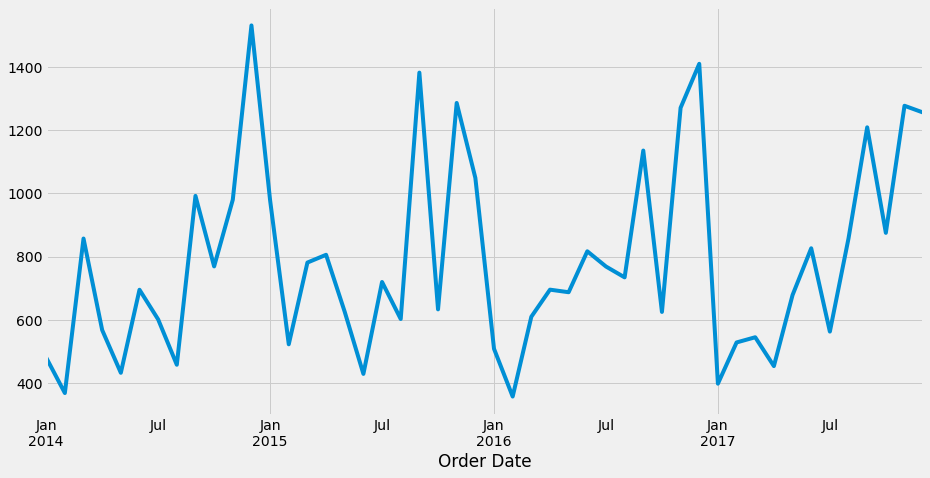

In [32]:
y.plot(figsize =(14,7))
plt.show()

In [ ]:
# Checking for Stationarity
# Augmented Dickey Fuller (ADF)
# H0 :- time series can be represented by a unit root , that is not stationary
# H1 :- if we reject null hypothesis then time series is stationary

In [36]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('p value: %f' % result[1])

p value: 0.000009


In [93]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}.
    regression : {"c","ct","ctt","nc"}
        Constant and trend order to include in regression.
    
        * "c" : constant only (default).
        * "ct" : constant and trend.
        * "ctt" : constant, and linear and quadratic trend.
        * "nc" : no constant, no trend.
    
    autolag : {"AIC", "BIC", "t-stat", None}
        Method to use when automatically determining the lag.
    
        * if None, then maxlag lags are used.
        * if "AIC" (default) or 

In [ ]:
# finding :- data is stationary

In [ ]:
# Decomposition

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [39]:
decomposition = seasonal_decompose(y)

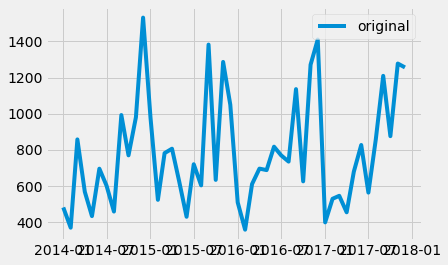

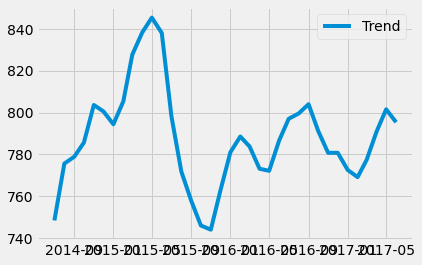

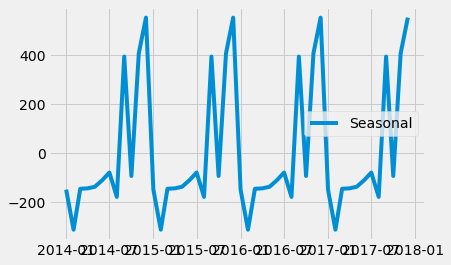

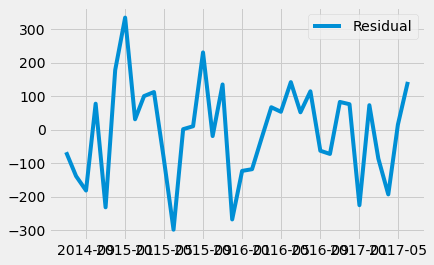

In [46]:
plt.plot(y,label = "original")
plt.legend(loc = "best")
trend = decomposition.trend
plt.show()
plt.plot(trend,label = "Trend")
plt.legend(loc = "best")
seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal,label = "Seasonal")
plt.legend(loc = "best")
residual = decomposition.resid
plt.show()
plt.plot(residual,label = "Residual")
plt.legend(loc = "best")

In [ ]:
# Forecasting
# ARIMA

In [57]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print("example of parameter combinations for seasonal ARIMA...")
print('SARIMAX:{} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX:{} x {}'.format(pdq[1],seasonal_pdq[2]))

example of parameter combinations for seasonal ARIMA...
SARIMAX:(0, 0, 1) x (0, 0, 1, 12)
SARIMAX:(0, 0, 1) x (0, 1, 0, 12)


In [ ]:
# Parameter selection using "grid search"

In [59]:
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order = param,
                                           seasonal_order = param_seasonal,enforce_stationarity = False,
                                           enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA{}X{}12 - AIC:{}'.format(param,param_seasonal, results.aic))
        except:
            continue
        

ARIMA(0, 0, 0)X(0, 0, 0, 12)12 - AIC:769.0817523205915


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)X(0, 0, 1, 12)12 - AIC:1483.7318517320264
ARIMA(0, 0, 0)X(0, 1, 0, 12)12 - AIC:477.7170130920111
ARIMA(0, 0, 0)X(0, 1, 1, 12)12 - AIC:302.27028997937776
ARIMA(0, 0, 0)X(1, 0, 0, 12)12 - AIC:497.2314433418337


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)X(1, 0, 1, 12)12 - AIC:1251.8290947410196
ARIMA(0, 0, 0)X(1, 1, 0, 12)12 - AIC:318.00471991163414
ARIMA(0, 0, 0)X(1, 1, 1, 12)12 - AIC:304.24882803012724
ARIMA(0, 0, 1)X(0, 0, 0, 12)12 - AIC:720.9252270758103


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)X(0, 0, 1, 12)12 - AIC:2661.8509138418694
ARIMA(0, 0, 1)X(0, 1, 0, 12)12 - AIC:466.5607429809128
ARIMA(0, 0, 1)X(0, 1, 1, 12)12 - AIC:291.6261389673306


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)X(1, 0, 0, 12)12 - AIC:499.5996378526474


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)X(1, 0, 1, 12)12 - AIC:2473.8534567423917
ARIMA(0, 0, 1)X(1, 1, 0, 12)12 - AIC:319.9884876946868
ARIMA(0, 0, 1)X(1, 1, 1, 12)12 - AIC:291.87255764942216
ARIMA(0, 1, 0)X(0, 0, 0, 12)12 - AIC:677.894766843944


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)X(0, 0, 1, 12)12 - AIC:1420.9787562751387
ARIMA(0, 1, 0)X(0, 1, 0, 12)12 - AIC:486.6378567222702
ARIMA(0, 1, 0)X(0, 1, 1, 12)12 - AIC:304.96712281679606
ARIMA(0, 1, 0)X(1, 0, 0, 12)12 - AIC:497.7889663004408


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)X(1, 0, 1, 12)12 - AIC:1422.5966322491772
ARIMA(0, 1, 0)X(1, 1, 0, 12)12 - AIC:319.7714068109211
ARIMA(0, 1, 0)X(1, 1, 1, 12)12 - AIC:306.911320015142
ARIMA(0, 1, 1)X(0, 0, 0, 12)12 - AIC:649.9056176817012


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)X(0, 0, 1, 12)12 - AIC:1822.6432323122222
ARIMA(0, 1, 1)X(0, 1, 0, 12)12 - AIC:458.8705548482893
ARIMA(0, 1, 1)X(0, 1, 1, 12)12 - AIC:279.58062333653896
ARIMA(0, 1, 1)X(1, 0, 0, 12)12 - AIC:486.1832977442685


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)X(1, 0, 1, 12)12 - AIC:1809.2992006774825
ARIMA(0, 1, 1)X(1, 1, 0, 12)12 - AIC:310.75743684174995
ARIMA(0, 1, 1)X(1, 1, 1, 12)12 - AIC:281.55766214612447
ARIMA(1, 0, 0)X(0, 0, 0, 12)12 - AIC:692.1645522067713


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)X(0, 0, 1, 12)12 - AIC:1482.9943734440822
ARIMA(1, 0, 0)X(0, 1, 0, 12)12 - AIC:479.4632147852136
ARIMA(1, 0, 0)X(0, 1, 1, 12)12 - AIC:304.20776751609645
ARIMA(1, 0, 0)X(1, 0, 0, 12)12 - AIC:480.9259367935189


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)X(1, 0, 1, 12)12 - AIC:1299.1520633515304
ARIMA(1, 0, 0)X(1, 1, 0, 12)12 - AIC:304.46646750845747
ARIMA(1, 0, 0)X(1, 1, 1, 12)12 - AIC:304.5842692143796
ARIMA(1, 0, 1)X(0, 0, 0, 12)12 - AIC:665.7794442186157


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)X(0, 0, 1, 12)12 - AIC:2624.009046761889
ARIMA(1, 0, 1)X(0, 1, 0, 12)12 - AIC:468.3685195814804
ARIMA(1, 0, 1)X(0, 1, 1, 12)12 - AIC:293.34221939659466
ARIMA(1, 0, 1)X(1, 0, 0, 12)12 - AIC:482.57633238769154


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)X(1, 0, 1, 12)12 - AIC:2273.6036156786517
ARIMA(1, 0, 1)X(1, 1, 0, 12)12 - AIC:306.0156002142528
ARIMA(1, 0, 1)X(1, 1, 1, 12)12 - AIC:293.75131882054353
ARIMA(1, 1, 0)X(0, 0, 0, 12)12 - AIC:671.2513547541903


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)X(0, 0, 1, 12)12 - AIC:1455.0581546888636
ARIMA(1, 1, 0)X(0, 1, 0, 12)12 - AIC:479.20034222811347
ARIMA(1, 1, 0)X(0, 1, 1, 12)12 - AIC:300.2130611619101
ARIMA(1, 1, 0)X(1, 0, 0, 12)12 - AIC:475.340365878363


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)X(1, 0, 1, 12)12 - AIC:1316.971301948119
ARIMA(1, 1, 0)X(1, 1, 0, 12)12 - AIC:300.62709013453946
ARIMA(1, 1, 0)X(1, 1, 1, 12)12 - AIC:302.3264992505978
ARIMA(1, 1, 1)X(0, 0, 0, 12)12 - AIC:649.0318019834657


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)X(0, 0, 1, 12)12 - AIC:781.4772415068467
ARIMA(1, 1, 1)X(0, 1, 0, 12)12 - AIC:460.4762687609372
ARIMA(1, 1, 1)X(0, 1, 1, 12)12 - AIC:281.38730069394256
ARIMA(1, 1, 1)X(1, 0, 0, 12)12 - AIC:469.52503546607875


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)X(1, 0, 1, 12)12 - AIC:1338.94017645722
ARIMA(1, 1, 1)X(1, 1, 0, 12)12 - AIC:297.7875439530977
ARIMA(1, 1, 1)X(1, 1, 1, 12)12 - AIC:283.3661014491331


In [97]:
#help(sm.tsa.statespace.SARIMAX)

In [64]:
# Fitting the ARIMA model
mod = sm.tsa.statespace.SARIMAX(y, order = (0, 1, 1),seasonal_order =(0, 1, 1, 12))
results = mod.fit()

In [65]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9985     12.414     -0.080      0.936     -25.329      23.332
ma.S.L12      -0.9748      8.886     -0.110      0.913     -18.391      16.441
sigma2      2.757e+04   4.87e+05      0.057      0.955   -9.27e+05    9.83e+05


In [ ]:
#ARIMA(0, 1, 1)X(0, 1, 1, 12)12

In [ ]:
# step 1 call the lib :- purchasing mixer grinder
# step 2 initiate the process :-  assembling different parts and plug in to power point 
# step 3 running the model :- presimg the button to perform the desired activity


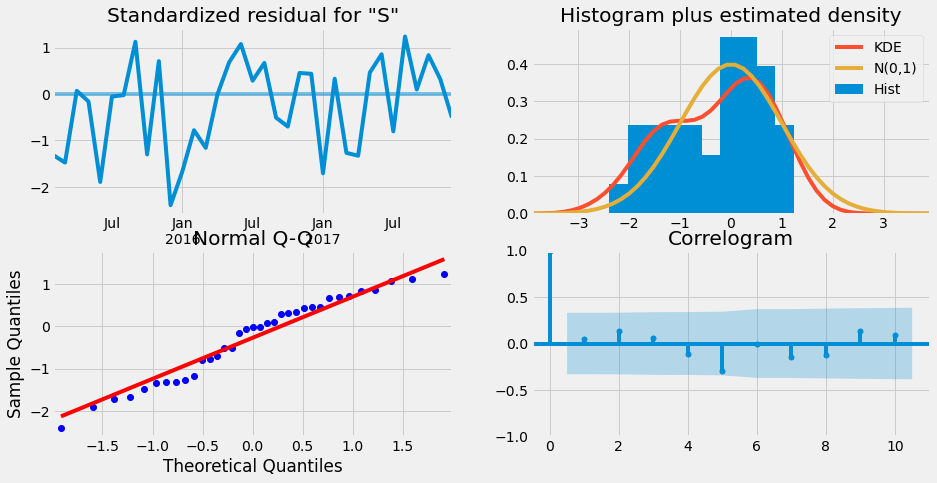

In [66]:
results.plot_diagnostics(figsize= (14,7))
plt.show()

In [ ]:
# Validating forecast
# set  forecast to start at 2017-01-01 to the end of the data 

In [72]:
pred.predicted_mean

Order Date
2017-01-01     739.337439
2017-02-01     462.735815
2017-03-01     795.594826
2017-04-01     715.276087
2017-05-01     587.249853
2017-06-01     658.720982
2017-07-01     719.589106
2017-08-01     616.460738
2017-09-01    1190.737971
2017-10-01     713.041802
2017-11-01    1215.173985
2017-12-01    1354.644121
Freq: MS, Name: predicted_mean, dtype: float64

In [73]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

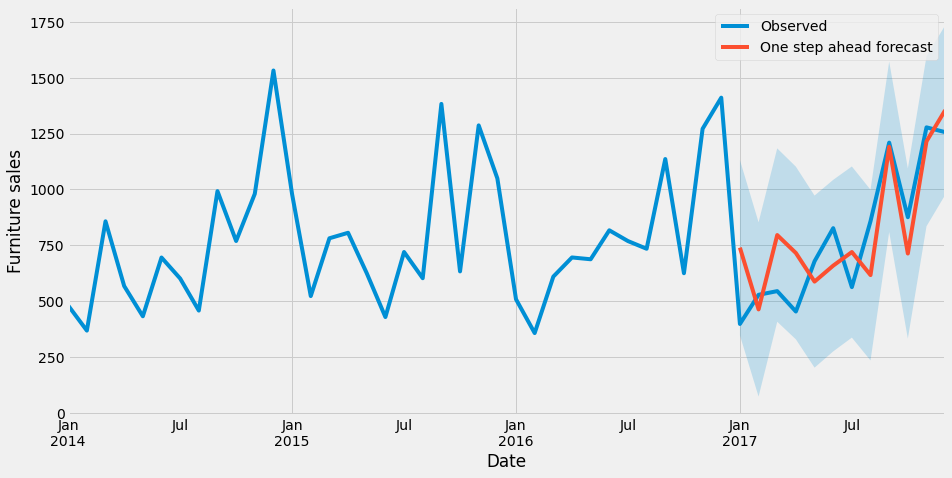

In [77]:
pred = results.get_prediction(start = pd.to_datetime("2017-01-01"),dynamic = False)
pred_ci = pred.conf_int()
ax= y["2014":].plot(label = "Observed")
pred.predicted_mean.plot(ax = ax,label = "One step ahead forecast", figsize= (14,7))
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1], alpha = .2)

ax.set_xlabel("Date")
ax.set_ylabel("Furniture sales")
plt.legend()
plt.show()


In [83]:
# calculate RMSE
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_forecasted-y_truth)**2).mean()
rmse = round(np.sqrt(mse),2)

In [84]:
rmse

185.37

In [85]:
mse

34361.45952916852

In [ ]:
# Forecasst for 2018

2018-01-01     640.289314
2018-02-01     492.469313
2018-03-01     742.084548
2018-04-01     676.617572
2018-05-01     652.455524
2018-06-01     737.213156
2018-07-01     709.255576
2018-08-01     712.323019
2018-09-01    1220.371146
2018-10-01     777.238794
2018-11-01    1247.699874
2018-12-01    1345.088968
Freq: MS, Name: predicted_mean, dtype: float64             lower Sales  upper Sales
2018-01-01   267.058335  1013.520294
2018-02-01   119.171636   865.766989
2018-03-01   368.784364  1115.384733
2018-04-01   303.316910  1049.918235
2018-05-01   279.154448  1025.756601
2018-06-01   363.911667  1110.514645
2018-07-01   335.953675  1082.557478
2018-08-01   339.020705  1085.625332
2018-09-01   847.068414  1593.673878
2018-10-01   403.935465  1150.542124
2018-11-01   874.390246  1621.009502
2018-12-01   971.751284  1718.426652


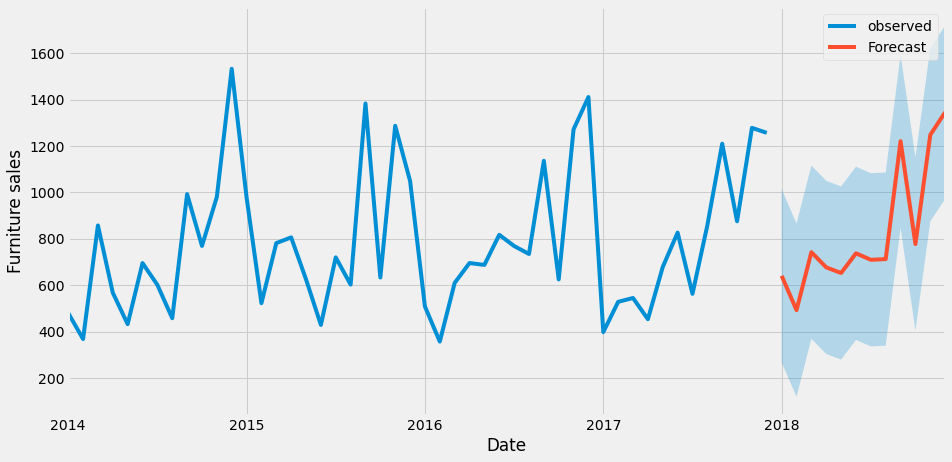

In [90]:
pred_uc = results.get_forecast(steps= 12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label= "observed",figsize = (14,7))
pred_uc.predicted_mean.plot(ax= ax,label = "Forecast")
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],alpha = .25)
ax.set_xlabel("Date")
ax.set_ylabel("Furniture sales")
print(pred_uc.predicted_mean,pred_ci)
#print(pred_ci)
plt.legend()
plt.show()